In [1]:
###### Applications Lab #1-- ATOC7500 Objective Analysis - bootstrapping
###### originally coded by Prof. Jen Kay (CU), modified by Prof. Elizabeth Barnes (CSU)

###LEARNING GOALS:
###1) Working in an ipython notebook: read in csv file, make histogram plot
###2) Assessing statistical significance using bootstrapping

### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

### Get your data

In [2]:
### Read in the data
filename='data/snow_enso_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,Year,LovelandPass_April1SWE_inches,Nino34_anomaly_prevDec
0,1936,15.8,-0.04
1,1937,10.1,0.63
2,1938,12.1,0.22
3,1939,18.2,-0.79
4,1940,10.0,0.05


In [3]:
### Print the data column names
print(data.columns[0])
print(data.columns[1])
print(data.columns[2])

Year
LovelandPass_April1SWE_inches
Nino34_anomaly_prevDec


In [4]:
### Print the data values - LOOK AT YOUR DATA.  If new to Python - check out what happens when you remove .values.
print(data['Year'].values)
print(data['LovelandPass_April1SWE_inches'].values)
print(data['Nino34_anomaly_prevDec'].values)

[1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
[15.8 10.1 12.1 18.2 10.   9.9 13.9 17.9 11.4 13.3 11.4 17.4 14.  14.
 14.  19.  24.  17.3 11.2 13.5 21.2 17.5 14.9 18.7 16.4 15.3 19.2 12.
 12.7 19.9  6.3 14.6 16.1 14.2 20.7 19.  16.2 12.  18.8 19.6 15.1 11.
 22.1 16.7 20.   9.  19.8 15.5 18.  12.3 18.2 11.3 15.9 12.1 13.8 13.2
 14.2 21.8 17.8 17.2 28.7 22.6 17.2 16.5 19.6 17.2 10.  19.9 13.1 15.6
 22.4 19.7 21.2 21.6 14.3 27.3 12.8 14.9 24.4 16.4 19. ]
[-0.04  0.63  0.22 -0.79  0.05  1.39  1.27 -1.24 -0.42 -0.26 -0.54  0.03
  0.18  0.38 -1.2  -1.04  0.71 -0.55  0.15 -0.79 -1.52 -0.58  1.18  0.3
 -0.05  0.02 -0.29 -0.49  1.05 -1.

### General statistics

In [5]:
### Calculate the average snowfall on April 1 at Loveland Pass, Colorado
SWE_avg=data['LovelandPass_April1SWE_inches'].mean()
SWE_std=data['LovelandPass_April1SWE_inches'].std()
N_SWE=len(data.LovelandPass_April1SWE_inches)

print('---- General Stats. ----')
print('mean SWE = ' + str(SWE_avg))
print('std SWE = ' + str(SWE_std))
print('number of Aprils = ' + str(N_SWE))

---- General Stats. ----
mean SWE = 16.33456790123457
std SWE = 4.221112427246731
number of Aprils = 81


### El Nino

In [6]:
### Print to figure out how to condition and make sure it is working.  Check out if new to Python.
#print(data.Nino34_anomaly_prevDec>1) ## this gives True/False
#print(data[data.Nino34_anomaly_prevDec>1])  ## where it is True, values will print

### Calculate the average SWE when it was an el nino year
SWE_avg_nino=data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches'].mean()
SWE_std_nino=data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches'].std()
N_SWE_nino=len(data[data.Nino34_anomaly_prevDec>1.0].LovelandPass_April1SWE_inches)

print('---- El Nino ----')
print('mean SWE = ' + str(SWE_avg_nino))
print('std SWE = ' + str(SWE_std_nino))
print('number of Aprils = ' + str(N_SWE_nino))


---- El Nino ----
mean SWE = 15.29375
std SWE = 4.00174441129532
number of Aprils = 16


### La Nina

In [7]:
### Calculate the average SWE when it was an la nina year
SWE_avg_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].mean()
SWE_std_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].std()
N_SWE_nina=len(data[data.Nino34_anomaly_prevDec<-1.0].LovelandPass_April1SWE_inches)

print('---- La Nina ----')
print('mean SWE = ' + str(SWE_avg_nina))
print('std SWE = ' + str(SWE_std_nina))
print('number of Aprils = ' + str(N_SWE_nina))


---- La Nina ----
mean SWE = 17.779999999999998
std SWE = 4.1063017772339006
number of Aprils = 15


# In-Class Demonstration

# My Final Answers

### Option 1: t/z test

First, let's look at the data...

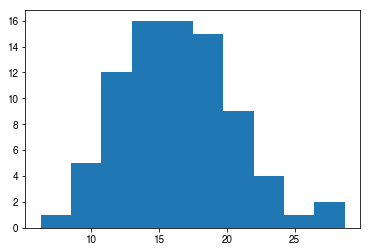

In [9]:
plt.hist(data['LovelandPass_April1SWE_inches'].values)
plt.show()

#### El Nino statistics

In [8]:
# El Nino results
tScore = (SWE_avg_nino-SWE_avg)/(SWE_std/np.sqrt(N_SWE_nino))
print(tScore)

# calculate the statistic
pValue = stats.t.cdf(tScore, df = N_SWE_nino-1, loc = 0.0, scale = 1.0)
print(pValue)

-0.9862972561604642
0.16981521185770043


#### La Nina statistics

In [30]:
# La Nina results
tScore = (SWE_avg_nina-SWE_avg)/(SWE_std/np.sqrt(N_SWE_nina))
print(tScore)

# calculate the statistic
pValue = stats.t.cdf(tScore, df = N_SWE_nino-1, loc = 0.0, scale = 1.0)
print(pValue)

1.3262225404035441
0.8976967456676459


### Option 2: Bootstrapping

In [31]:
### Bootstrap!!  Generate random samples of size N_SWE_nino and N_SWE_nina.  Do it once to see if it works.
P_random=np.random.choice(data.LovelandPass_April1SWE_inches,size = N_SWE_nino, replace = True)
print(P_random)  ## LOOK AT YOUR DATA

[21.6 15.6 12.3 19.2 13.8 14.2 28.7 15.5 17.2 15.8 19.2 27.3 24.  14.2
 18.  19.9]


In [34]:
### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Nbs=1000

## initialize array
P_Bootstrap=np.empty((Nbs,N_SWE_nino))

## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data.LovelandPass_April1SWE_inches,size = N_SWE_nino, replace = True)

## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
print(np.shape(P_Bootstrap_mean)) ## check length to see if you averaged across the correct axis

(1000,)


1.0584575259952274


Text(0.5,1,'Bootstrapped Randomly Selected Mean SWE Values')

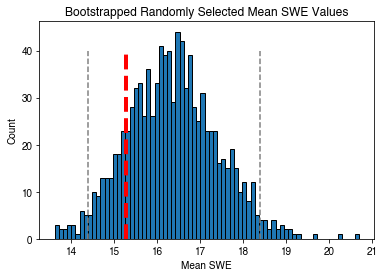

In [40]:
P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print(P_Bootstrap_mean_std)

### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.plot((np.percentile(P_Bootstrap_mean,2.5),np.percentile(P_Bootstrap_mean,2.5)),(0,40),'--', color = 'gray')
plt.plot((np.percentile(P_Bootstrap_mean,97.5),np.percentile(P_Bootstrap_mean,97.5)),(0,40),'--', color = 'gray')

plt.plot((SWE_avg_nino,SWE_avg_nino),(0,40),'--r', linewidth = 4)

plt.xlabel('Mean SWE')
plt.ylabel('Count')
plt.title('Bootstrapped Randomly Selected Mean SWE Values')